In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import PolynomialFeatures

### Data Visualizations

In [2]:
df = pd.read_csv('C:/Users/jul/Desktop/MA415/high_diamond_ranked_10min.csv')
df.head(3)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [3]:
df.shape    # 9879 rows and 40 columns in the dataset

(9879, 40)

In [4]:
df = df.drop(df.columns[0], axis = 1)    # drop the 'gameId' column
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [5]:
df.columns    # all features in the dataset

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

#### Gold

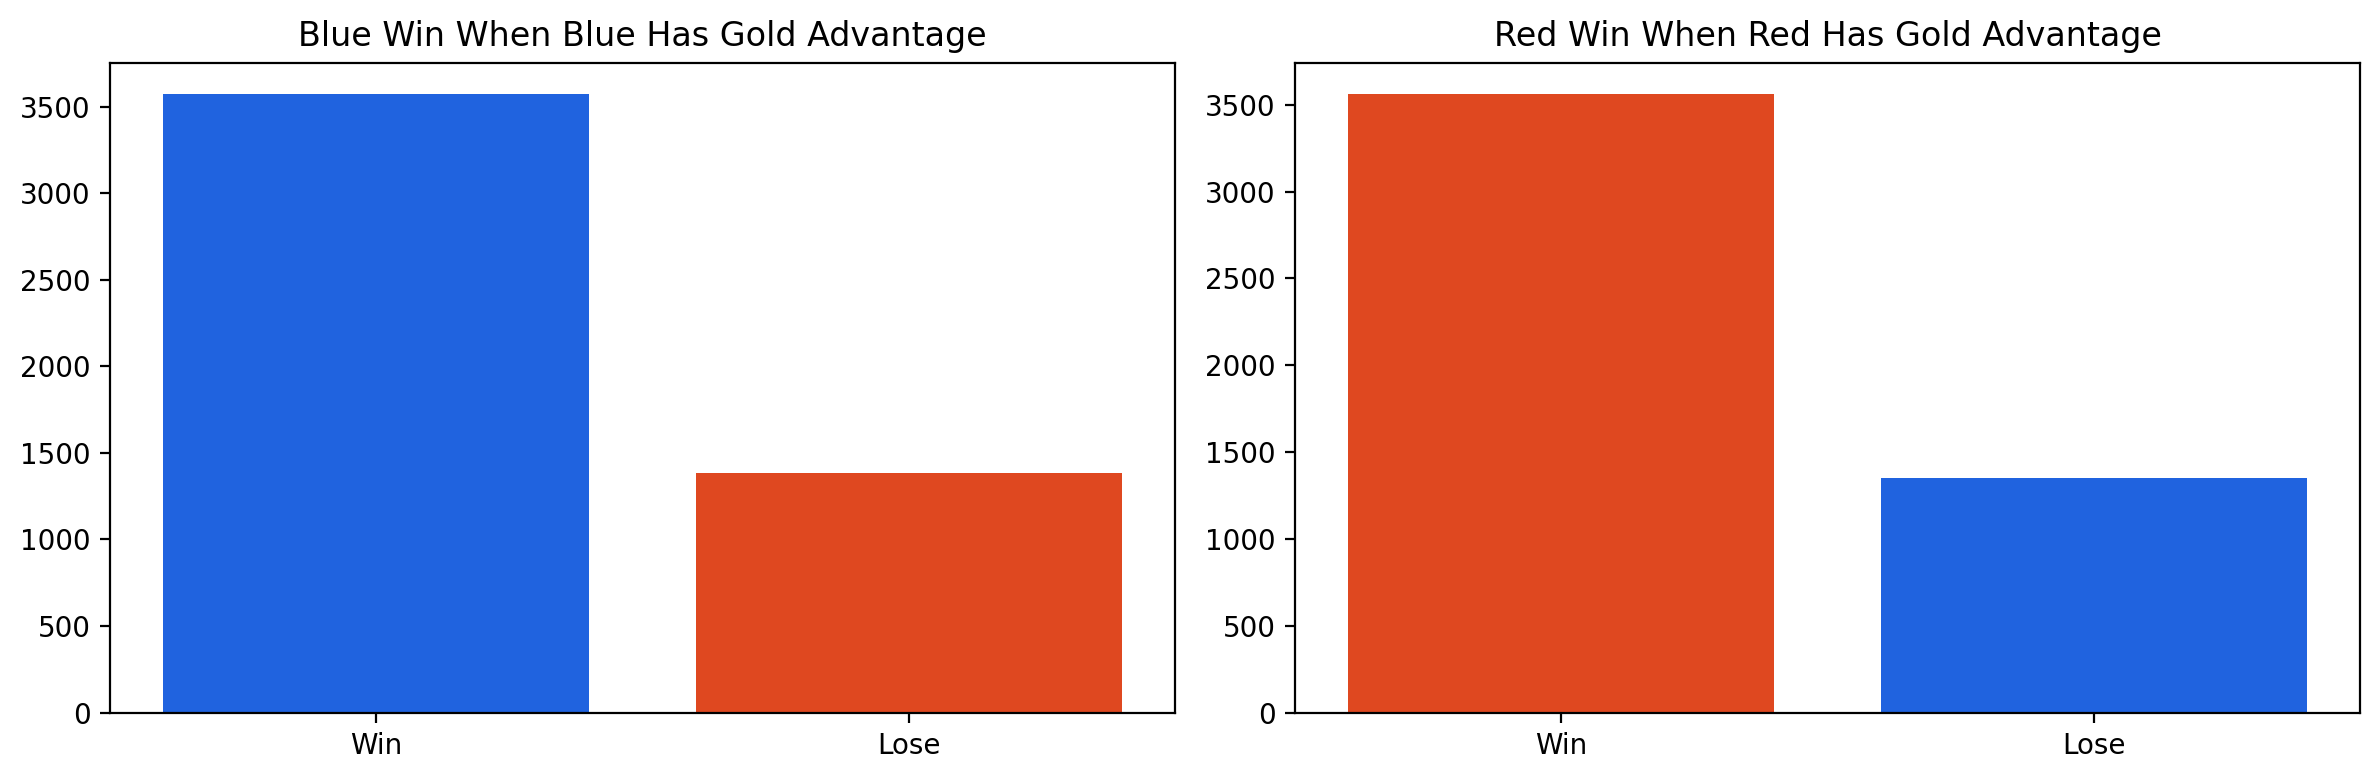

In [6]:
palette=['#FF3500',"#0059FF"]
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.barplot(x=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().index, y=df[df["blueGoldDiff"]>0]["blueWins"].replace({1:"Win", 0:"Lose"}).value_counts().values, ax=ax[0], palette=palette[::-1])
sns.barplot(x=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().index, y=df[df["redGoldDiff"]>0]["blueWins"].replace({0:"Win", 1:"Lose"}).value_counts().values, ax=ax[1], palette=palette)

ax[0].set_title("Blue Win When Blue Has Gold Advantage")
ax[1].set_title("Red Win When Red Has Gold Advantage")

plt.tight_layout()

In [7]:
print(f'When Blue Team has a gold advantage in the first 10 minutes of the game, Blue Team has {round(len(df[(df["blueGoldDiff"]>0) & (df["blueWins"]==1)]) / len(df[df["blueGoldDiff"]>0]),2) * 100}% win rate.')
print("-"*98)
print(f'When Red Team has a gold advantage in the first 10 minutes of the game, Red Team has {round(len(df[(df["redGoldDiff"]>0) & (df["blueWins"]==0)]) / len(df[df["redGoldDiff"]>0]),2) * 100}% win rate.')

When Blue Team has a gold advantage in the first 10 minutes of the game, Blue Team has 72.0% win rate.
--------------------------------------------------------------------------------------------------
When Red Team has a gold advantage in the first 10 minutes of the game, Red Team has 72.0% win rate.


#### Experience

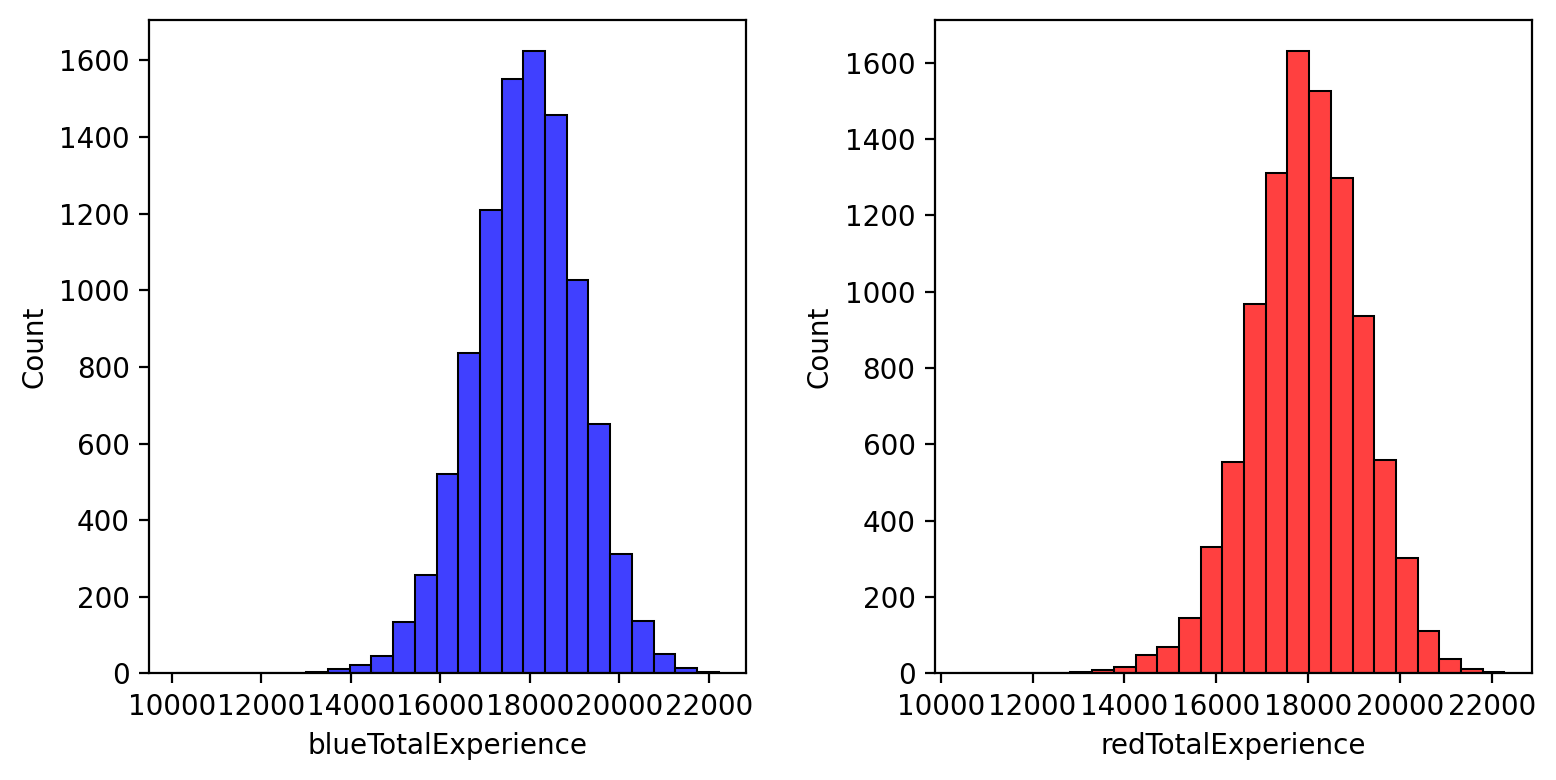

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4), dpi=200)

sns.histplot(data=df, x="blueTotalExperience", bins=25, ax=ax[0], color="b")

sns.histplot(data=df, x="redTotalExperience", bins=25, ax=ax[1], color="r")

plt.tight_layout()

In [9]:
print(f'When Blue Team wins, their average total experience is {round(df[df["blueWins"] == 1].blueTotalExperience.mean(),2)}')
print(f'When Blue Team loses, their average total experience is {round(df[df["blueWins"] == 0].blueTotalExperience.mean(),2)}')
print("-"*70)
print(f'When Red Team wins, their average total experience is {round(df[df["blueWins"] == 0].redTotalExperience.mean(),2)}')
print(f'When Red Team loses, their average total experience is {round(df[df["blueWins"] == 1].redTotalExperience.mean(),2)}')

When Blue Team wins, their average total experience is 18404.58
When Blue Team loses, their average total experience is 17453.47
----------------------------------------------------------------------
When Red Team wins, their average total experience is 18425.37
When Red Team loses, their average total experience is 17496.3


#### Elite Monster

In [10]:
df["whoWins"] = df.blueWins.map({0:"RedWins", 1:"BlueWins"})

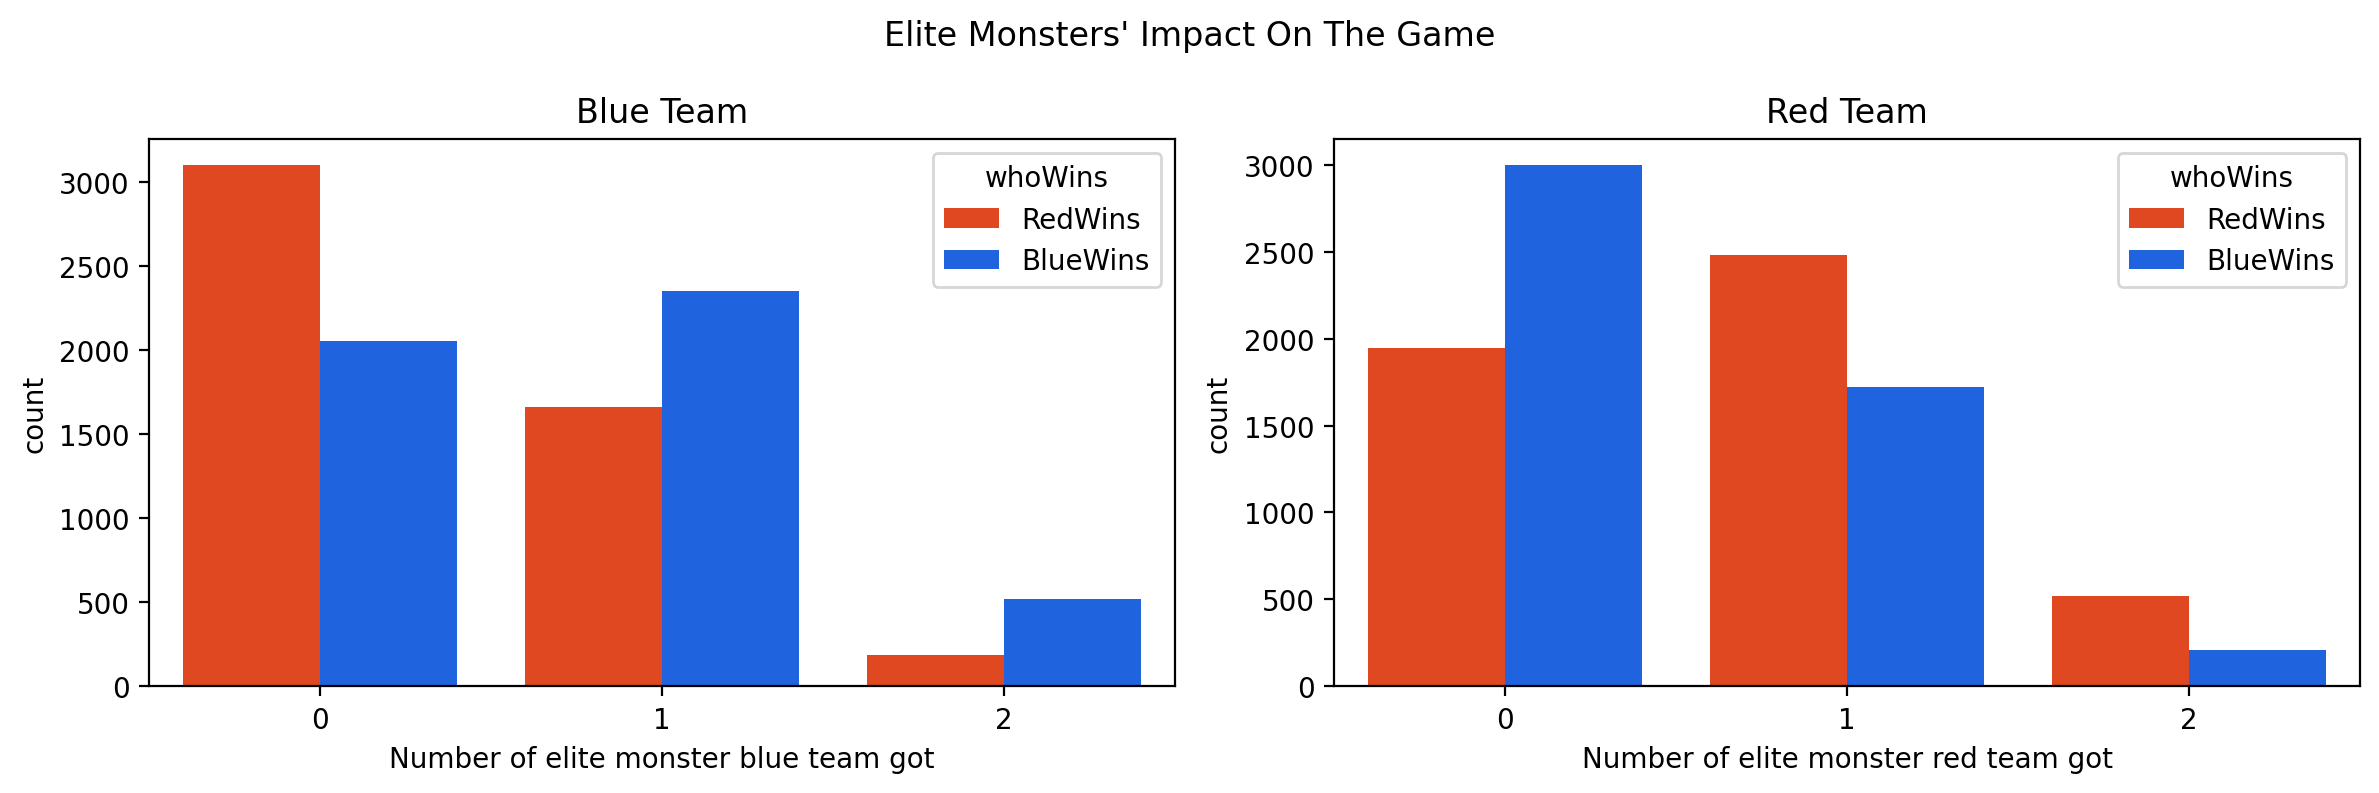

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(12,4), dpi=200)
sns.countplot(data=df, x="blueEliteMonsters", hue="whoWins", ax=ax[0], palette=palette)
sns.countplot(data=df, x="redEliteMonsters",hue="whoWins", ax=ax[1], palette=palette)
plt.suptitle("Elite Monsters' Impact On The Game")

ax[0].set_title("Blue Team")
ax[0].set_xlabel("Number of elite monster blue team got")

ax[1].set_title("Red Team")
ax[1].set_xlabel("Number of elite monster red team got")

plt.tight_layout()

In [12]:
print(f"Out of {len(df)} games, Blue Team got both herald and dragon for {len(df[df['blueEliteMonsters'] == 2])} times. In those games Blue Team's win rate is {round(len(df[(df['blueEliteMonsters'] == 2) & (df['blueWins'] == 1)]) / len(df[df['blueEliteMonsters'] == 2]) * 100,2)}%")
print(f"Out of {len(df)} games, Red Team got both herald and dragon for {len(df[df['redEliteMonsters'] == 2])} times. In those games Red Team's win rate is {round(len(df[(df['redEliteMonsters'] == 2) & (df['blueWins'] == 0)]) / len(df[df['redEliteMonsters'] == 2]) * 100,2)}%")

Out of 9879 games, Blue Team got both herald and dragon for 710 times. In those games Blue Team's win rate is 73.52%
Out of 9879 games, Red Team got both herald and dragon for 730 times. In those games Red Team's win rate is 71.37%


### Data Cleaning

(array([1.534e+03, 6.238e+03, 4.800e+02, 4.120e+02, 5.410e+02, 1.900e+02,
        1.220e+02, 5.100e+01, 4.900e+01, 8.300e+01, 6.300e+01, 1.000e+01,
        2.600e+01, 8.000e+00, 1.800e+01, 9.000e+00, 1.300e+01, 1.400e+01,
        6.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  5.        ,  13.16666667,  21.33333333,  29.5       ,
         37.66666667,  45.83333333,  54.        ,  62.16666667,
         70.33333333,  78.5       ,  86.66666667,  94.83333333,
        103.        , 111.16666667, 119.33333333, 127.5       ,
        135.66666667, 143.83333333, 152.        , 160.16666667,
        168.33333333, 176.5       , 184.66666667, 192.83333333,
        201.        , 209.16666667, 217.33333333, 225.5       ,
        233.66666667, 241.83333333, 250.        ]),
 <BarContainer object of 30 artists>)

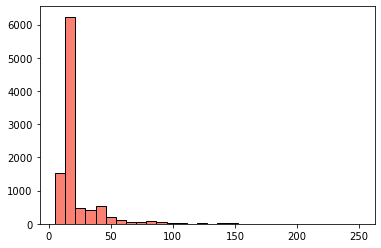

In [13]:
# matplotlib histogram of the feature 'blueWardsPlaced'
plt.hist(df['blueWardsPlaced'], color = 'salmon', edgecolor = 'black',
         bins = int(150/5))

In [14]:
bwp = df['blueWardsPlaced'] 
rwp = df['redWardsPlaced']
# 90% confidence interval
print(bwp.quantile([0.05, 0.95]).T.round(2))
print(rwp.quantile([0.05, 0.95]).T.round(2))

0.05    12.0
0.95    53.0
Name: blueWardsPlaced, dtype: float64
0.05    12.0
0.95    53.0
Name: redWardsPlaced, dtype: float64


In [15]:
df = df[df['blueWardsPlaced'] <= 50]  # drop the edge cases, wards placed > 50
df = df[df['redWardsPlaced'] <= 50]
df.shape

(8780, 40)

In [16]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'whoWins'],
      dtype='object')

In [17]:
# drop the dependent features
df = df.drop(['blueEliteMonsters', 'blueGoldPerMin', 'redFirstBlood', 'redKills',
              'redDeaths', 'redEliteMonsters', 'redGoldDiff', 'redGoldPerMin','whoWins'], axis = 1)
df.shape

(8780, 31)

In [18]:
df.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redExperienceDiff,redCSPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,0,0,16567,6.8,17047,197,55,8,19.7
1,0,12,1,0,5,5,5,0,0,0,...,1,1,1,17620,6.8,17438,240,52,1173,24.0
2,0,15,0,0,7,11,4,1,0,0,...,0,0,0,17285,6.8,17254,203,28,1033,20.3


### Correlation between winning game and other features

In [19]:
corr = df.corr()["blueWins"].sort_values(ascending=False).drop("blueWins")

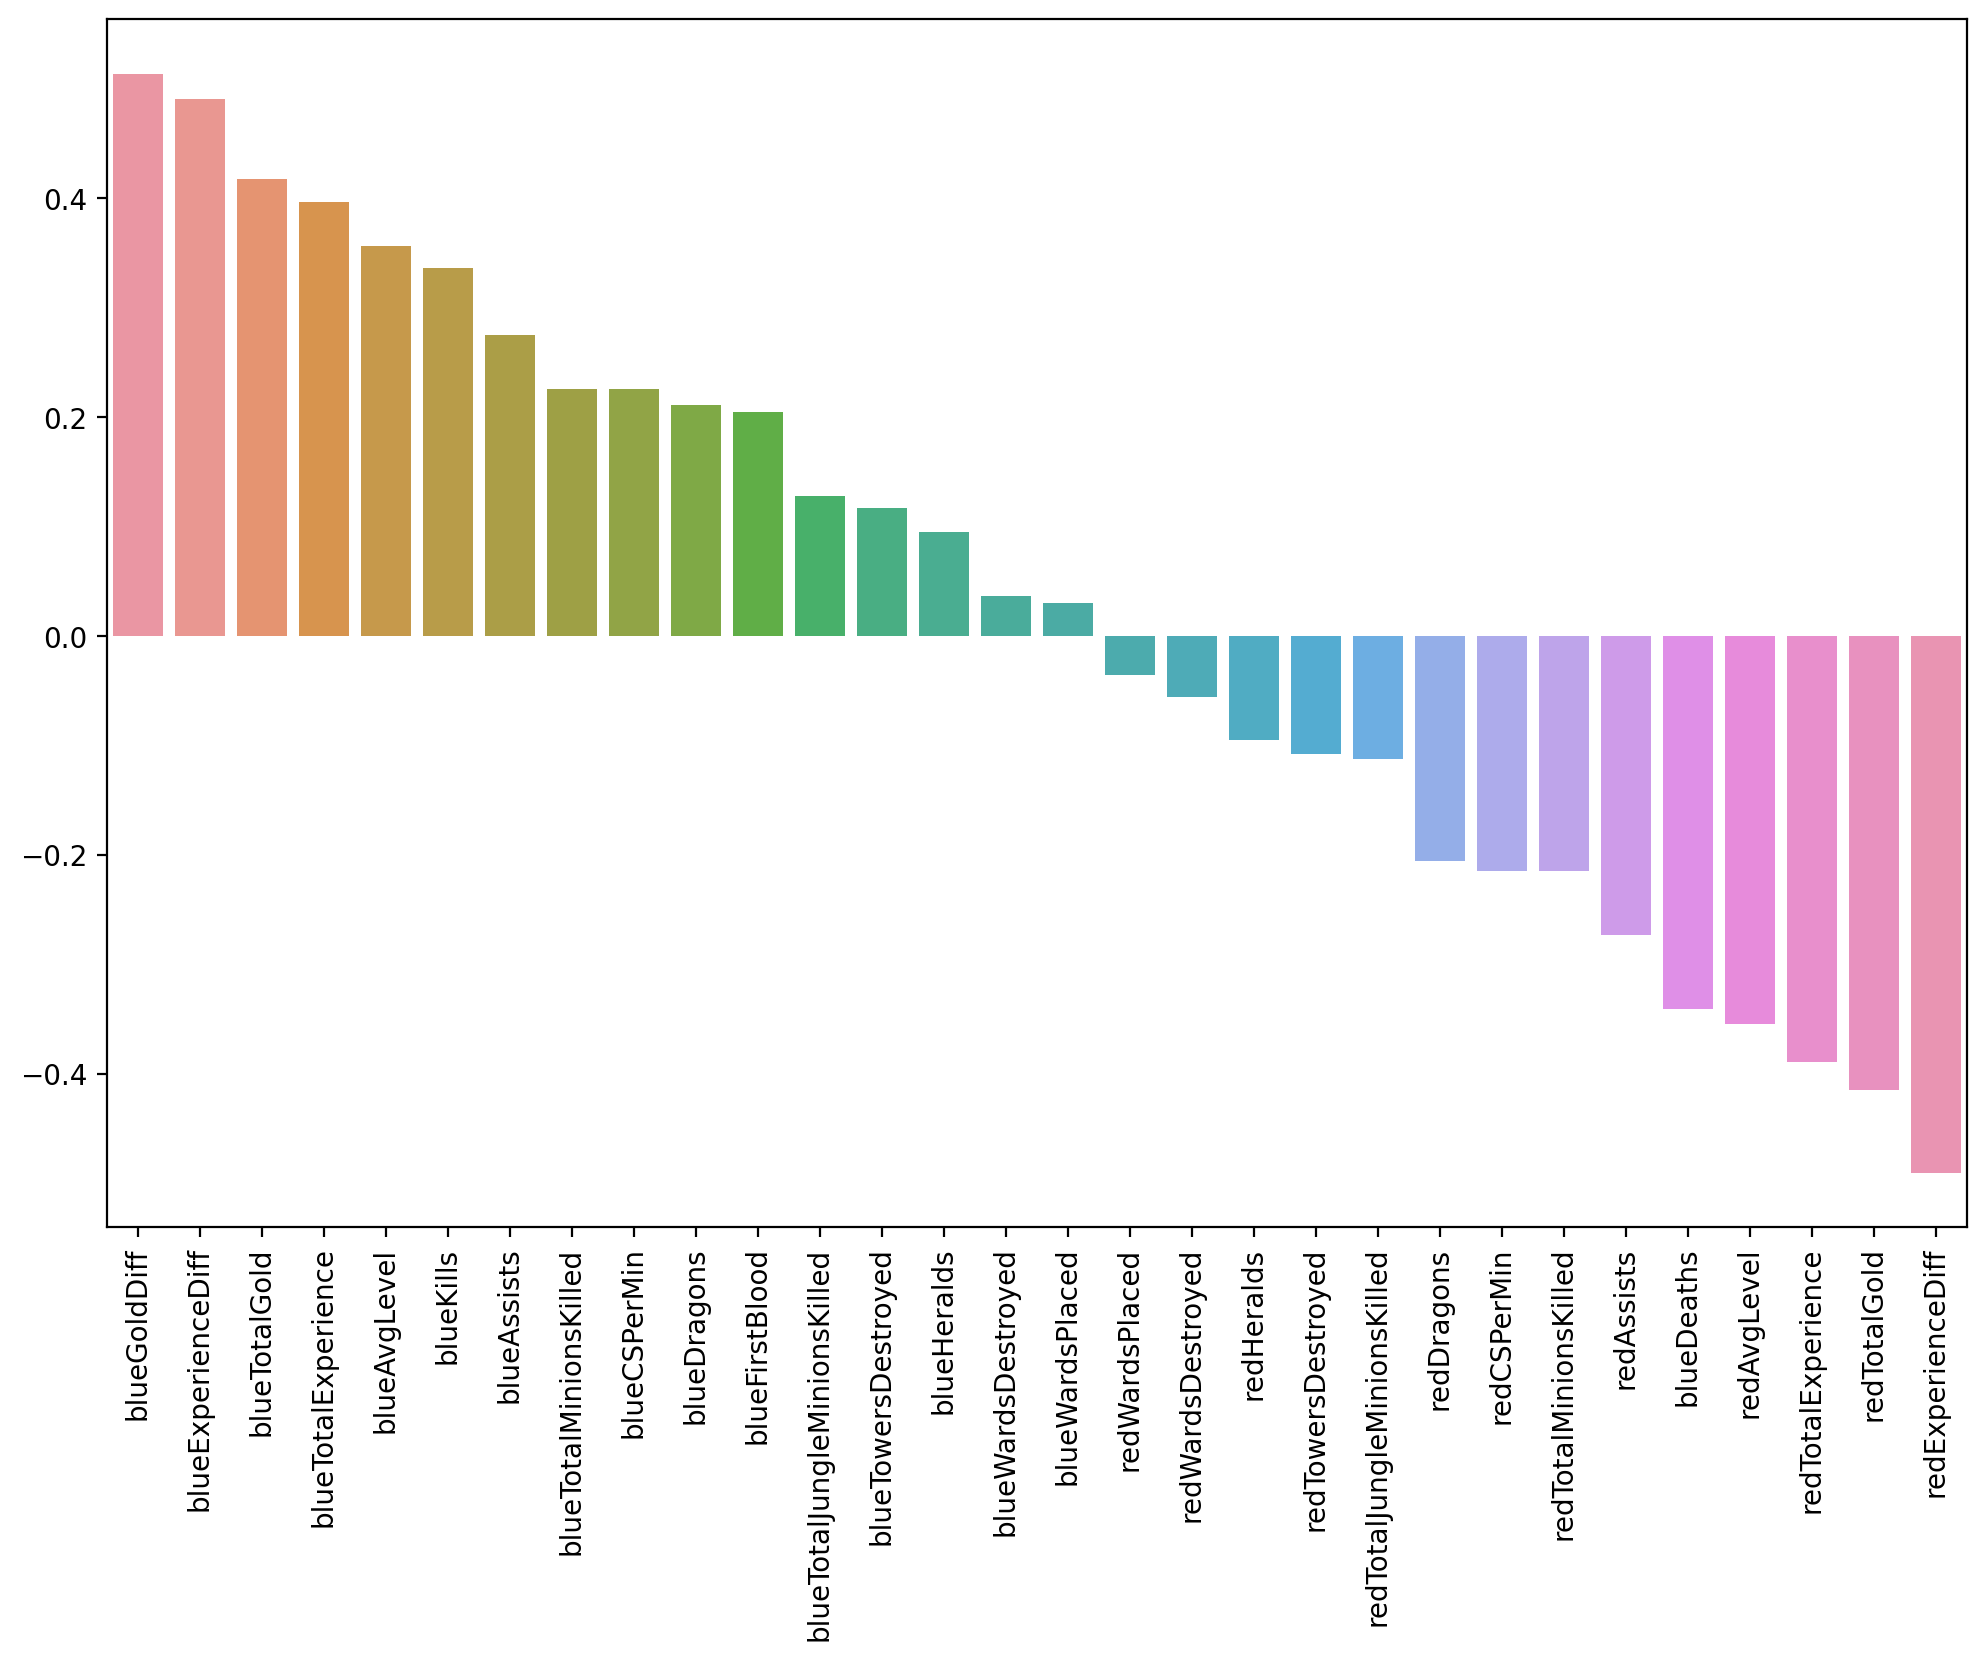

In [20]:
plt.figure(figsize=(12,8), dpi=200)
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90);

In [21]:
corr

blueGoldDiff                    0.513017
blueExperienceDiff              0.490114
blueTotalGold                   0.417143
blueTotalExperience             0.396128
blueAvgLevel                    0.355831
blueKills                       0.335893
blueAssists                     0.275258
blueTotalMinionsKilled          0.225477
blueCSPerMin                    0.225477
blueDragons                     0.210606
blueFirstBlood                  0.204285
blueTotalJungleMinionsKilled    0.128078
blueTowersDestroyed             0.117130
blueHeralds                     0.095202
blueWardsDestroyed              0.036931
blueWardsPlaced                 0.029676
redWardsPlaced                 -0.035701
redWardsDestroyed              -0.055316
redHeralds                     -0.094591
redTowersDestroyed             -0.107559
redTotalJungleMinionsKilled    -0.112341
redDragons                     -0.205863
redCSPerMin                    -0.214356
redTotalMinionsKilled          -0.214356
redAssists      

From the bar plot of correlation, we find that Gold Difference between the team is the most important feature in terms of winning the game. It is followed by Experience Difference, Total Gold, Total Experience, KDA's.

### Scatter plots

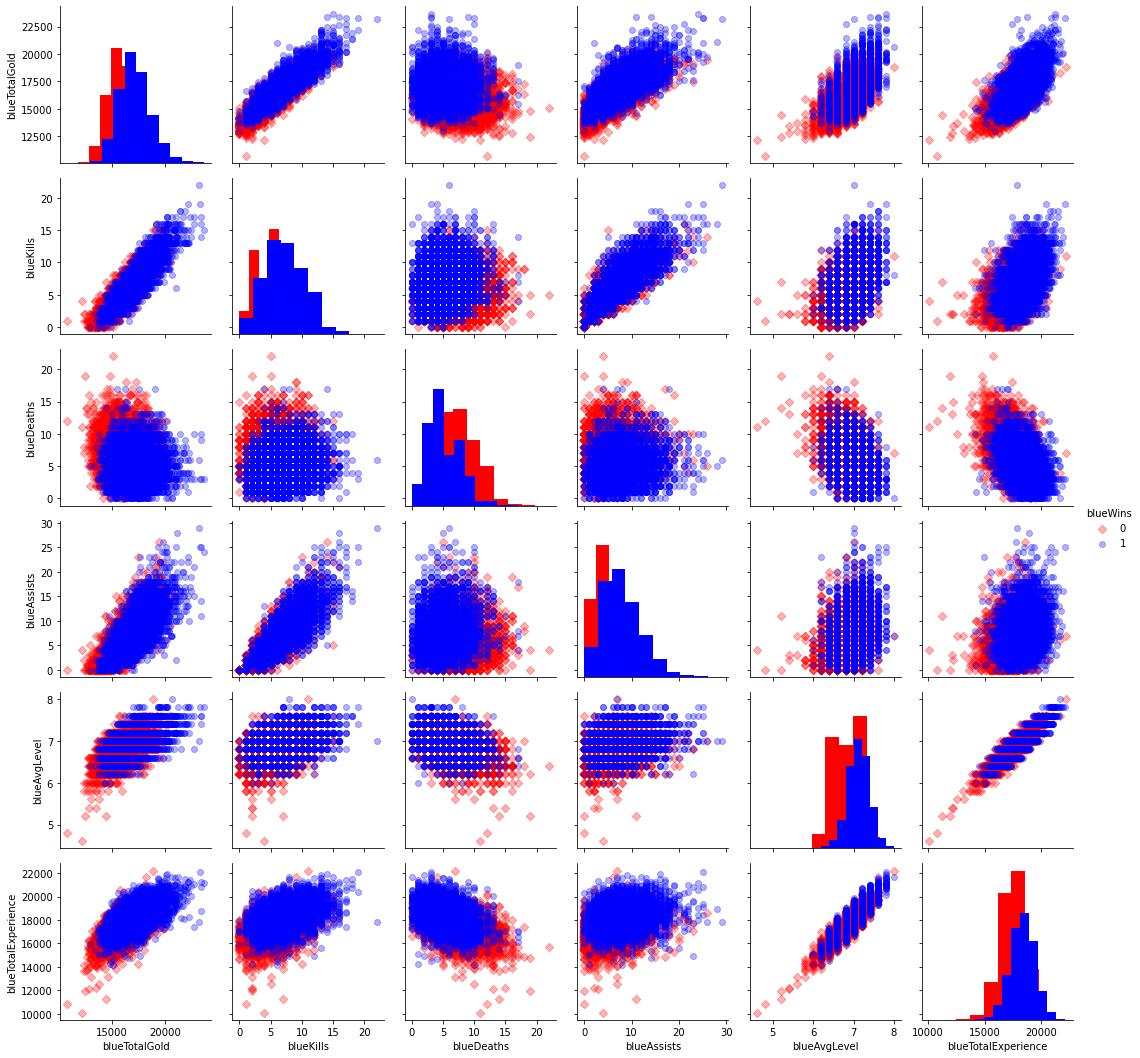

In [22]:
plot = sns.PairGrid(data = df, vars=['blueTotalGold', 'blueKills', 'blueDeaths', 'blueAssists', 'blueAvgLevel', 'blueTotalExperience'], hue='blueWins', palette=sns.color_palette(['r', 'b']), hue_kws={"marker": ["D", "o"], "alpha": [0.3, 0.3]})
plot.map_diag(plt.hist)
plot.map_offdiag(plt.scatter)
plot.add_legend()
plt.show()

### KNN Classifier

In [23]:
(train, test) = train_test_split(df, train_size = 0.8, test_size=0.2, shuffle = True, stratify = df.blueWins, random_state = 0)
print(train['blueWins'].value_counts())
print(test['blueWins'].value_counts())

1    3528
0    3496
Name: blueWins, dtype: int64
1    882
0    874
Name: blueWins, dtype: int64


In [24]:
# baseline error rate on the training set
round(3496/(3528 + 3496), 3)

0.498

In [25]:
# baseline error rate on the test set
round(874/(882 + 874), 3)

0.498

In [26]:
X_train = train.iloc[:, 1:]
X_test = test.iloc[:, 1:]
y_train = train.iloc[:, 0]
y_test = test.iloc[:, 0]
features = X_test.columns

In [27]:
# Scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# convert back to data frame
X_train = pd.DataFrame(X_train, columns = features)
X_test = pd.DataFrame(X_test, columns = features)

In [29]:
# cross Validation
knn = KNeighborsClassifier()
K = np.arange(100) + 1
grid = {"n_neighbors": K}
grid

knnCV = GridSearchCV(knn, param_grid=grid, return_train_score=True, n_jobs=-1)

knnCV.fit(X_train, y_train)

print(f'The best params is {knnCV.best_params_}, and the best valid score is {knnCV.best_score_}')

The best params is {'n_neighbors': 72}, and the best valid score is 0.7307779501373808


In [30]:
print('training accuracy: ', knnCV.score(X_train, y_train))
print('testing accuracy: ', knnCV.score(X_test, y_test))

training accuracy:  0.7378986332574032
testing accuracy:  0.715261958997722


### Logistic Regression (Without Feature Engineering)

In [31]:
X = df.drop('blueWins', axis = 1)
y = df.blueWins

In [32]:
# cross-validation
lgr = LogisticRegression()

scores = cross_validate(lgr, X, y, return_train_score = True)
R2_train = scores['train_score'].mean()
R2_valid = scores['test_score'].mean()

print('train R2', R2_train.round(3))
print('validation R2', R2_valid.round(3))

train R2 0.732
validation R2 0.733


### Feature Importance

In [33]:
lgr = LogisticRegression()

feature = []
R2_train = []
R2_valid = []

for k in range(X.shape[1]):
    feature.append(X.columns[k])
    x = X.iloc[:,k]
    R2_valid_scores =  cross_validate(lgr, x.values.reshape(-1,1), y)['test_score']
    R2_valid.append(R2_valid_scores.mean())
    lgr.fit(x.values.reshape(-1,1), y)
    R2_train.append(lgr.score(x.values.reshape(-1,1),y))

In [34]:
# Determine feature importance by looking at corresponding R-squared value for each feature
results = pd.DataFrame()
results['feature'] = feature
results['train R2'] = R2_train
results['valid R2'] = R2_valid
results.sort_values('valid R2', ascending = False)

,feature,train R2,valid R2
14,blueGoldDiff,0.725513,0.725513
15,blueExperienceDiff,0.715034,0.715034
28,redExperienceDiff,0.715034,0.715034
24,redAvgLevel,0.650228,0.650228
10,blueAvgLevel,0.646925,0.646925
4,blueDeaths,0.641230,0.641230
3,blueKills,0.634169,0.634169
5,blueAssists,0.614579,0.614579
19,redAssists,0.611390,0.611390
2,blueFirstBlood,0.602164,0.602164


### LASSO Regularization

In [35]:
grid = {'alpha': [0.1,1,10,100,1000,10000]}
lasso = Lasso()
lassoCV = GridSearchCV(lasso, param_grid=grid, return_train_score = True)
lassoCV.fit(X,y)

C:\Users\jul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.373e+01, tolerance: 1.756e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\jul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.391e+01, tolerance: 1.756e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\jul\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+01, tolerance: 1.7

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 10, 100, 1000, 10000]},
             return_train_score=True)

In [36]:
print(lassoCV.best_params_)

{'alpha': 0.1}


In [37]:
results = pd.DataFrame()
results['alpha'] = np.log10(grid['alpha'])
results['train R2'] = lassoCV.cv_results_['mean_train_score']
results['valid R2'] = lassoCV.cv_results_['mean_test_score']
results.head(3)

,alpha,train R2,valid R2
0,-1.0,0.269503,0.268068
1,0.0,0.268180,0.267387
2,1.0,0.267985,0.267564


<AxesSubplot:xlabel='alpha'>

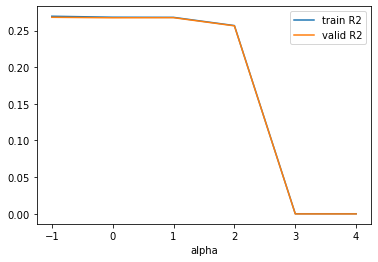

In [38]:
plot1 = results.plot.line(x = 'alpha', y = 'train R2')
results.plot.line(x = 'alpha', y = 'valid R2', ax = plot1)

In [39]:
coef = pd.Series(lassoCV.best_estimator_.coef_, index = X.columns)
coef.sort_values(ascending = False)

redTotalMinionsKilled           0.000520
blueTotalJungleMinionsKilled    0.000261
blueGoldDiff                    0.000056
blueTotalGold                   0.000022
blueExperienceDiff              0.000017
blueTotalExperience             0.000013
blueCSPerMin                   -0.000000
redTotalJungleMinionsKilled    -0.000000
redAvgLevel                     0.000000
redTowersDestroyed              0.000000
redHeralds                     -0.000000
redDragons                     -0.000000
redAssists                     -0.000000
redWardsDestroyed              -0.000000
redWardsPlaced                 -0.000000
blueWardsPlaced                 0.000000
blueWardsDestroyed             -0.000000
blueAvgLevel                   -0.000000
blueTowersDestroyed            -0.000000
blueHeralds                     0.000000
blueDragons                     0.000000
blueAssists                     0.000000
blueDeaths                     -0.000000
blueKills                       0.000000
blueFirstBlood  

In [40]:
# Let's select the features which have non-zero coefficents by LASSO to fit a new model.
X_new = X.loc[:,['blueGoldDiff','blueExperienceDiff','redExperienceDiff','blueTotalExperience',
                  'redTotalMinionsKilled','blueTotalJungleMinionsKilled','blueTotalGold',
                 'redTotalExperience','redTotalGold','blueTotalMinionsKilled']]
X_new.head(3)

,blueGoldDiff,blueExperienceDiff,redExperienceDiff,blueTotalExperience,redTotalMinionsKilled,blueTotalJungleMinionsKilled,blueTotalGold,redTotalExperience,redTotalGold,blueTotalMinionsKilled
0,643,-8,8,17039,197,36,17210,17047,16567,195
1,-2908,-1173,1173,16265,240,43,14712,17438,17620,174
2,-1172,-1033,1033,16221,203,46,16113,17254,17285,186


In [41]:
# Nearly same results for Logistic Regression
lgr = LogisticRegression()

scores = cross_validate(lgr, X_new, y, return_train_score = True)
R2_train = scores['train_score'].mean()
R2_valid = scores['test_score'].mean()

print('train R2', R2_train.round(3))
print('validation R2', R2_valid.round(3))

train R2 0.732
validation R2 0.732


### Decision Tree

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [43]:
grid = {'max_depth':np.arange(1,20)}

Tree = DecisionTreeClassifier()
TreeCV = GridSearchCV(Tree, param_grid = grid, return_train_score = True)

In [44]:
TreeCV.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True)

In [45]:
TreeCV.best_params_

{'max_depth': 1}

In [46]:
print('accuracy rate', TreeCV.best_score_)

accuracy rate 0.7252847380410022


In [47]:
results = pd.DataFrame()
results['depth'] = grid['max_depth']
results['train acc'] = TreeCV.cv_results_['mean_train_score']
results['valid acc'] = TreeCV.cv_results_['mean_test_score']
results.head(5)

,depth,train acc,valid acc
0,1,0.727107,0.725285
1,2,0.727107,0.725285
2,3,0.727306,0.724601
3,4,0.732574,0.723349
4,5,0.740290,0.723804


<AxesSubplot:xlabel='depth'>

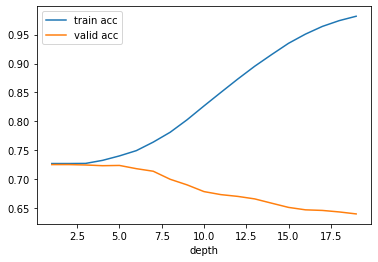

In [48]:
plot1 = results.plot.line(x = 'depth', y = 'train acc')
results.plot.line(x = 'depth', y = 'valid acc', ax = plot1)

In [49]:
tr1 = DecisionTreeClassifier(max_depth = 1)
tr1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [50]:
dot_data = tree.export_graphviz(tr1,
                               out_file = None,
                               feature_names = X.columns,
                               class_names = ['win', 'lose'],
                               proportion = True,
                               impurity = False,
                               filled = True,
                               rounded = True)

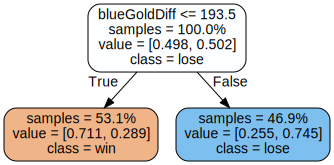

In [51]:
graph = graphviz.Source(dot_data)
graph   # tree with depth 1

In [52]:
# export graph to a pdf file
graph.render('DecisionTreeDepth1')

'DecisionTreeDepth1.pdf'

In [53]:
tr2 = DecisionTreeClassifier(max_depth = 3)
tr2.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [54]:
dot_data = tree.export_graphviz(tr2,
                               out_file = None,
                               feature_names = X.columns,
                               class_names = ['win', 'lose'],
                               proportion = True,
                               impurity = False,
                               filled = True,
                               rounded = True)

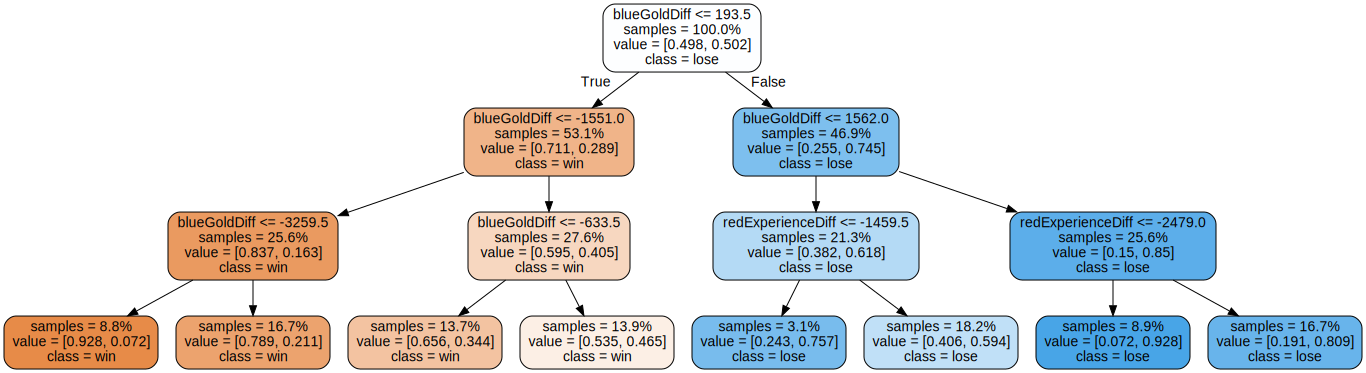

In [55]:
graph = graphviz.Source(dot_data)
graph   # tree with depth 3

In [56]:
# export graph to a pdf file
graph.render('DecisionTreeDepth3')

'DecisionTreeDepth3.pdf'

### Feature Engineering

In [57]:
# Drop a few less significant features which have very low correlations with the target "blueWins" column
X_train = X_train.drop(['blueHeralds', 'blueWardsDestroyed', 'blueWardsPlaced',
                        'redWardsPlaced', 'redWardsDestroyed', 'redHeralds'], axis = 1)
X_test = X_test.drop(['blueHeralds', 'blueWardsDestroyed', 'blueWardsPlaced',
                        'redWardsPlaced', 'redWardsDestroyed', 'redHeralds'], axis = 1)

In [58]:
# engineer training set polynomial features
poly = PolynomialFeatures(2, interaction_only=True, include_bias = False)
Xe_train = poly.fit_transform(X_train)
col = poly.get_feature_names_out(X_train.columns)
Xe_train = pd.DataFrame(Xe_train, columns=col)
print('             features shape =', X_train.shape)
print('features (engineered) shape =', Xe_train.shape)

             features shape = (7024, 24)
features (engineered) shape = (7024, 300)


In [59]:
# engineer test set polynomial features
poly = PolynomialFeatures(2, interaction_only=True, include_bias=False)
Xe_test = poly.fit_transform(X_test)
col = poly.get_feature_names_out(X_test.columns)
Xe_test = pd.DataFrame(Xe_test, columns=col)
print('             features shape =', X_test.shape)
print('features (engineered) shape =', Xe_test.shape)

             features shape = (1756, 24)
features (engineered) shape = (1756, 300)


In [60]:
# standardize features and convert back to dataframe
stnd = StandardScaler()
stnd.fit(Xe_train)
Xe_train = pd.DataFrame(stnd.transform(Xe_train),
                                columns = Xe_train.columns)
Xe_test  = pd.DataFrame(stnd.transform(Xe_test),
                                columns = Xe_test.columns)

### Feature Selection (degree = 2)

In [59]:
# create bias column
Xe_train['bias'] = 1
Xe_test['bias']  = 1

In [60]:
def SelectFeature(model,candidates,X,y):
    N = len(candidates)
    R2 = np.zeros(N)
    for k in range(N):   
        model_k = model.copy()
        model_k.append(candidates[k])
        cv_results = cross_validate(lgr, X[model_k], y, n_jobs=-1)
        R2[k] = cv_results['test_score'].mean()
    R2_max   = R2.max()
    selected = candidates[R2.argmax()] 
    return (selected,R2_max)

In [61]:
# forward feature selection
model      = ['bias']
candidates = list(Xe_train.columns)
candidates.remove('bias')
R2 = []
lgr = LogisticRegression(fit_intercept=False)
cv_results = cross_validate(lgr,
                            Xe_train[model].values.reshape(-1,1),
                            y_train)
R2.append(cv_results['test_score'].mean())

while (len(candidates) > 0):
    print('candidates left:', len(candidates), end='')
    (selected, R2_max) = SelectFeature(model, candidates,
                                      Xe_train,
                                      y_train)
    candidates.remove(selected)
    model.append(selected)
    R2.append(R2_max)
    print('  selected:',selected)

results = pd.DataFrame()
results['feature added'] = model
results['valid R2'] = R2

ix = results['valid R2'].idxmax()
print()
print('use features 0 to',ix,end='')
R2_max = results['valid R2'].max()
print('    maximum validation R2 =',round(R2_max,3))
model_opt = model[0:ix+1]

## It takes a few hours to run...

candidates left: 300  selected: blueGoldDiff
candidates left: 299  selected: redDragons
candidates left: 298  selected: blueExperienceDiff
candidates left: 297  selected: blueAvgLevel redAssists
candidates left: 296  selected: blueGoldDiff redDragons
candidates left: 295  selected: blueTotalMinionsKilled redTotalMinionsKilled
candidates left: 294  selected: blueFirstBlood blueExperienceDiff
candidates left: 293  selected: blueFirstBlood redTowersDestroyed
candidates left: 292  selected: redTowersDestroyed redTotalMinionsKilled
candidates left: 291  selected: redExperienceDiff
candidates left: 290  selected: blueFirstBlood redExperienceDiff
candidates left: 289  selected: blueTotalMinionsKilled redCSPerMin
candidates left: 288  selected: blueCSPerMin redTotalMinionsKilled
candidates left: 287  selected: blueCSPerMin redCSPerMin
candidates left: 286  selected: redTowersDestroyed redCSPerMin
candidates left: 285  selected: blueKills redTowersDestroyed
candidates left: 284  selected: blueT

candidates left: 41  selected: redTotalExperience redTotalMinionsKilled
candidates left: 40  selected: blueExperienceDiff redCSPerMin
candidates left: 39  selected: blueKills redDragons
candidates left: 38  selected: blueExperienceDiff redTotalMinionsKilled
candidates left: 37  selected: redTotalExperience redCSPerMin
candidates left: 36  selected: redTotalMinionsKilled redCSPerMin
candidates left: 35  selected: redTotalMinionsKilled redExperienceDiff
candidates left: 34  selected: redTotalGold redTotalMinionsKilled
candidates left: 33  selected: redTotalGold redCSPerMin
candidates left: 32  selected: blueDeaths blueGoldDiff
candidates left: 31  selected: blueGoldDiff redTotalMinionsKilled
candidates left: 30  selected: redExperienceDiff redCSPerMin
candidates left: 29  selected: blueAssists blueDragons
candidates left: 28  selected: blueAssists
candidates left: 27  selected: redDragons redTotalGold
candidates left: 26  selected: blueTotalGold redDragons
candidates left: 25  selected: 

In [62]:
lgr.fit(Xe_train[model_opt], y_train)
R2_train = lgr.score(Xe_train[model_opt], y_train)
R2_test  = lgr.score(Xe_test[model_opt], y_test)
print('train R2', R2_train.round(3))
print(' test R2', R2_test.round(3))

train R2 0.739
 test R2 0.727


In [67]:
myCoef = np.reshape(lgr.coef_, 101)

In [68]:
# coefficients
coef = pd.Series(myCoef, index = Xe_train[model_opt].columns)
print(coef.sort_values(ascending=False).head(10))

blueGoldDiff                              1.063778
blueTotalGold redTowersDestroyed          0.320518
blueExperienceDiff                        0.239191
redTowersDestroyed redExperienceDiff      0.178472
blueTowersDestroyed redAvgLevel           0.142373
blueAssists redAssists                    0.113575
redTowersDestroyed redTotalGold           0.112386
blueAvgLevel redExperienceDiff            0.088385
blueTowersDestroyed redAssists            0.077594
blueTowersDestroyed blueExperienceDiff    0.073258
dtype: float64
